<h1><b>Model Training Notebook</b></h1>

<h3><b>Importing Libraries</b></h3>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_score, recall_score


<h3><b>Loading and cleaning data</b></h3>

In [39]:
mental_health_data = pd.read_csv("../data/raw/Mental Health Dataset.csv") 

In [40]:
mental_health_data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [41]:
mental_health_data.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [42]:
mental_health_data.dropna(axis = 0, inplace = True)
mental_health_data.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [43]:
mental_health_data.Days_Indoors.value_counts()

Days_Indoors
1-14 days             62429
31-60 days            59625
Go out Every day      57323
More than 2 months    54918
15-30 days            52867
Name: count, dtype: int64

In [44]:
mental_health_data.Growing_Stress.value_counts()

Growing_Stress
Maybe    98225
Yes      97854
No       91083
Name: count, dtype: int64

In [45]:
mental_health_data.drop("Timestamp", axis = 1, inplace = True)

In [46]:
mental_health_data.duplicated().sum()
mental_health_data.drop_duplicates(inplace = True)
mental_health_data.duplicated().sum()

0

In [47]:
mental_health_data.shape

(92920, 16)

In [48]:
mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92920 entries, 3 to 292360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   92920 non-null  object
 1   Country                  92920 non-null  object
 2   Occupation               92920 non-null  object
 3   self_employed            92920 non-null  object
 4   family_history           92920 non-null  object
 5   treatment                92920 non-null  object
 6   Days_Indoors             92920 non-null  object
 7   Growing_Stress           92920 non-null  object
 8   Changes_Habits           92920 non-null  object
 9   Mental_Health_History    92920 non-null  object
 10  Mood_Swings              92920 non-null  object
 11  Coping_Struggles         92920 non-null  object
 12  Work_Interest            92920 non-null  object
 13  Social_Weakness          92920 non-null  object
 14  mental_health_interview  92920 non-null  o

In [49]:
mental_health_data = mental_health_data.astype('category')

In [50]:
mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92920 entries, 3 to 292360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   92920 non-null  category
 1   Country                  92920 non-null  category
 2   Occupation               92920 non-null  category
 3   self_employed            92920 non-null  category
 4   family_history           92920 non-null  category
 5   treatment                92920 non-null  category
 6   Days_Indoors             92920 non-null  category
 7   Growing_Stress           92920 non-null  category
 8   Changes_Habits           92920 non-null  category
 9   Mental_Health_History    92920 non-null  category
 10  Mood_Swings              92920 non-null  category
 11  Coping_Struggles         92920 non-null  category
 12  Work_Interest            92920 non-null  category
 13  Social_Weakness          92920 non-null  category
 14  mental_hea

<h3><b>Tranforming categorical features</b><h3>

In [51]:
mental_health_data.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [52]:
mental_health_data_transformed = pd.DataFrame()

In [60]:
for i in mental_health_data.columns:
    print(i)
    print(mental_health_data[i].unique())
    print("\n")

Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Country
['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom', ..., 'Moldova', 'Colombia', 'Georgia', 'Czech Republic', 'Philippines']
Length: 35
Categories (35, object): ['Australia', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', ..., 'Switzerland', 'Thailand', 'United Kingdom', 'United States']


Occupation
['Corporate', 'Student', 'Business', 'Housewife', 'Others']
Categories (5, object): ['Business', 'Corporate', 'Housewife', 'Others', 'Student']


self_employed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


family_history
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


treatment
['Yes', 'No']
Categories (2, object): ['No', 'Yes']


Days_Indoors
['1-14 days', 'Go out Every day', 'More than 2 months', '15-30 days', '31-60 days']
Categories (5, object): ['1-14 days', '15-30 days', '31-60 days', 'Go out Every day', 'More than 2 months']


Growing_Stress
['Yes', 'No', 'Maybe']
Categories 

In [67]:
le = LabelEncoder()
for features in mental_health_data.columns:
    mental_health_data_transformed[features]=le.fit_transform(mental_health_data[features])
    print(f"{features}\n{le.classes_}\n")

Gender
['Female' 'Male']

Country
['Australia' 'Belgium' 'Bosnia and Herzegovina' 'Brazil' 'Canada'
 'Colombia' 'Costa Rica' 'Croatia' 'Czech Republic' 'Denmark' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'India' 'Ireland' 'Israel' 'Italy'
 'Mexico' 'Moldova' 'Netherlands' 'New Zealand' 'Nigeria' 'Philippines'
 'Poland' 'Portugal' 'Russia' 'Singapore' 'South Africa' 'Sweden'
 'Switzerland' 'Thailand' 'United Kingdom' 'United States']

Occupation
['Business' 'Corporate' 'Housewife' 'Others' 'Student']

self_employed
['No' 'Yes']

family_history
['No' 'Yes']

treatment
['No' 'Yes']

Days_Indoors
['1-14 days' '15-30 days' '31-60 days' 'Go out Every day'
 'More than 2 months']

Growing_Stress
['Maybe' 'No' 'Yes']

Changes_Habits
['Maybe' 'No' 'Yes']

Mental_Health_History
['Maybe' 'No' 'Yes']

Mood_Swings
['High' 'Low' 'Medium']

Coping_Struggles
['No' 'Yes']

Work_Interest
['Maybe' 'No' 'Yes']

Social_Weakness
['Maybe' 'No' 'Yes']

mental_health_interview
['Maybe' 'No' 'Yes']

care_

In [65]:
mental_health_data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


Gender categorical labels: {Female:0, Male:1}

Occupation categorical labels: {Business:0, Corporate:1, Housewife:2, Others:3, Student:4}

Self employed categorical labels: {No:0, Yes:1}

Family history categorical labels: {No:0, Yes:1}

Treatment catergorical labels: {No:0, Yes:1}

Days indoors categorical labels: {1-14 days:0, 15-30 days:1, 31-60 days:2, Go out Every day:3, More than 2 months:4}

Growing stress categorical labels: {Maybe:0, No:1, Yes:2}

Changes habits categorical labels: {Maybe:0, No:1, Yes:2}

Mental health history categorical labels: {Maybe:0, No:1, Yes:2}

Mood swings categorical labels: {High:0, Low:1, Medium:2}

Coping strugles categorical labels: {No:0, Yes:1}

Work interest categorical labels: {Maybe:0, No:1, Yes:2}

Social weakness categorical labels: {Maybe:0, No:1, Yes:2}

Mental health interview categorical labels: {Maybe:0, No:1, Yes:2}

Care options categorical labels: {No:0, Not sure:1, Yes:2}

<Axes: >

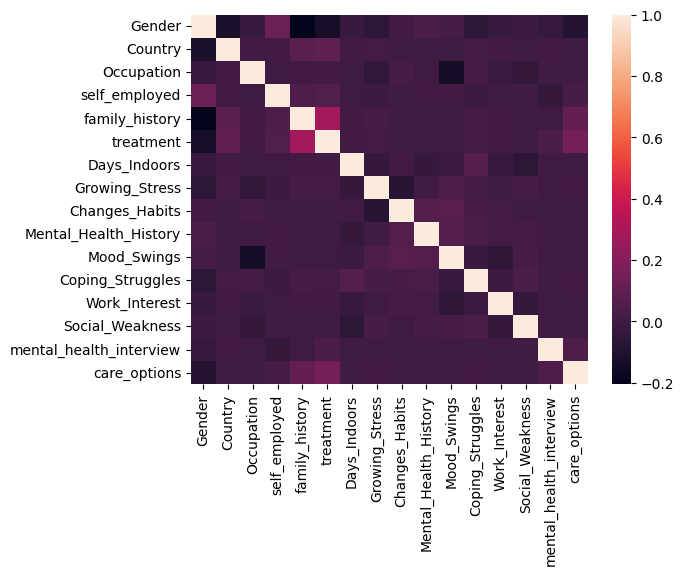

In [68]:
sns.heatmap(mental_health_data_transformed.corr())